In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [3]:
rate = 100 # Hz

In [4]:
data_file_path = os.path.join("dataset", "Torso", "Acc_x.txt")
data = np.loadtxt(data_file_path)
print("data.shape", data.shape)

data.shape (196072, 500)


In [5]:
data1d = data.reshape(-1)
print("data1d.shape", data1d.shape)

data1d.shape (98036000,)


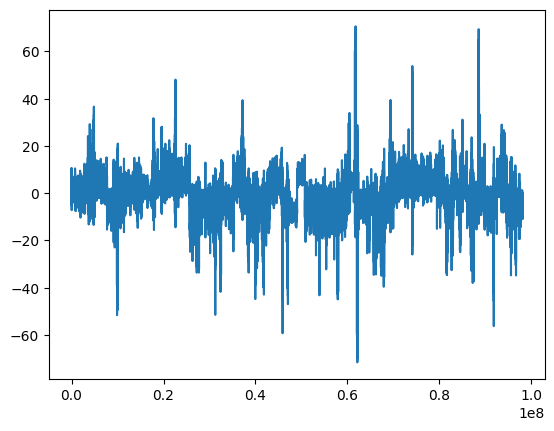

In [6]:
plt.plot(data1d)

(257,)
(196072,)
(257, 196072)


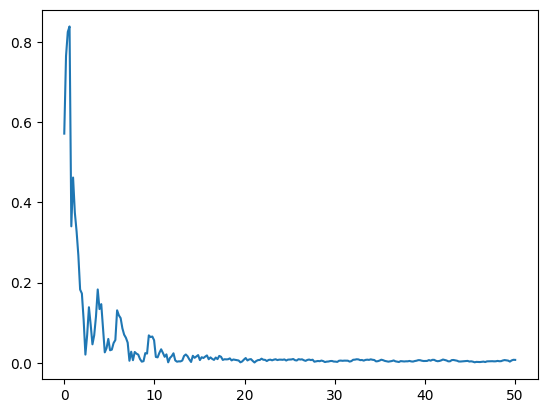

In [7]:
from scipy import signal
#data
freqs, times, specs = signal.spectrogram(data1d,
                                        fs=rate, # Frequence Hz
                                        window="boxcar", # Rectangular segments
                                        nperseg=500, # 0.5s
                                        nfft=512, # Length of the FFT used, if a zero padded FFT is desired
                                        noverlap=0, # no overlap
                                        detrend=False,
                                        mode = 'magnitude') # retrieve complex number

plt.plot(freqs, specs[:,0])
print(freqs.shape)
print(times.shape) # windows number 
print(specs.shape) # frequence number x windows number 

(257,)
(196072,)
(257, 196072)


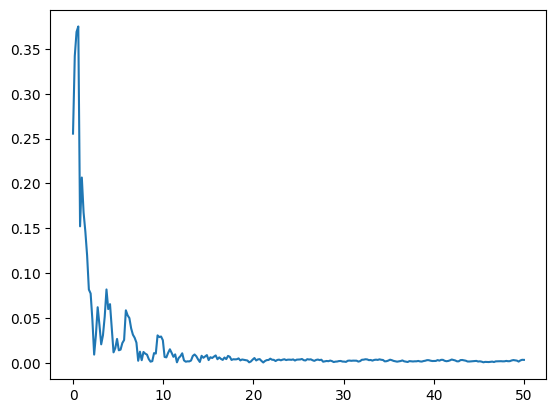

In [17]:
freqs_stft, times_stft, specs_stft = signal.stft(
    data1d,
    fs=rate, # Frequence Hz
    window="boxcar", # Rectangular segments
    nperseg=500, # 0.5s
    nfft=512, # Length of the FFT used, if a zero padded FFT is desired
    noverlap=0, # no overlap
    detrend=False,
    scaling = 'spectrum', # retrieve complex number
    boundary=None,
    ) 

plt.plot(freqs_stft, np.abs(specs_stft)[:,0])
print(freqs_stft.shape)
print(times_stft.shape) # windows number 
print(specs_stft.shape) # frequence number x windows number 

times.shape (98036000,)
isftft_data.shape (98036000,)


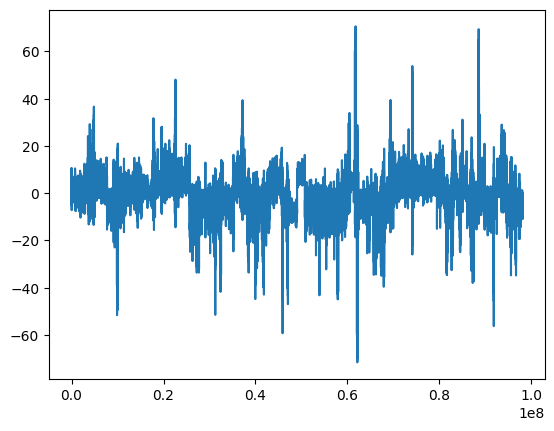

In [22]:
#data
times, isftft_data = signal.istft(
    specs_stft,
    fs=rate, # Frequence Hz
    window="boxcar", # Rectangular segments
    nperseg=500, # 0.5s
    nfft=512, # Length of the FFT used, if a zero padded FFT is desired
    noverlap=0, # no overlap
    scaling = 'spectrum', # retrieve complex number
    boundary=None,
    ) 

plt.plot(isftft_data)
print("times.shape", times.shape)
print("isftft_data.shape", isftft_data.shape)


In [23]:
%%writefile utils/FFT.py

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile

from scipy import signal

rate = 100 # Hz
window_size = 500 # 0.5s
FFT_length = 512 # Length of the FFT used, if a zero padded FFT is desired. In this case, 12 zero padding is used
#data
def spectrogram(data, verbose=False):
    data1d = data.reshape(-1)
    if verbose:
        print("data1d.shape", data1d.shape)
    freqs, times, specs = signal.spectrogram(
        data1d,
        fs=rate, # Frequence Hz
        window="boxcar", # Rectangular segments
        nperseg=window_size, # 0.5s
        nfft=FFT_length, # Length of the FFT used, if a zero padded FFT is desired. In this case, 12 zero padding is used
        noverlap=0, # no overlap
        detrend=False,
        mode = 'magnitude') # retrieve complex number

    if verbose:
        print("freqs.shape", freqs.shape)
        print("specs.shape", specs.shape)

    return freqs, specs

def stft(data, verbose=False):
    data1d = data.reshape(-1)
    if verbose:
        print("data1d.shape", data1d.shape)
    freqs, times, specs = signal.stft(
        data1d,
        fs=rate, # Frequence Hz
        window="boxcar", # Rectangular segments
        nperseg=window_size, # 0.5s
        nfft=FFT_length, # Length of the FFT used, if a zero padded FFT is desired
        noverlap=0, # no overlap
        detrend=False,
        scaling = 'spectrum', # retrieve complex number
        boundary=None,
    ) 

    if verbose:
        print("freqs.shape", freqs.shape)
        print("specs.shape", specs.shape)

    return freqs, np.abs(specs)




Overwriting utils/FFT.py
